In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from mpl_toolkits import mplot3d

In [3]:
class kmean:
    
    def __init__(self,n_cluster,random_state=123,max_iteration=10):
        self.n_cluster = n_cluster
        self.datasets = pd.read_csv('data.csv')
        self.datasets = pd.DataFrame(self.datasets)
        self.random_state = random_state
        self.max_iteration = max_iteration

    def import_from_file(self):
        return self.datasets
    
    def print_result(self,sse_array ):
        print("Interations!!!\n\n\n",self.datasets)
        print("Sum of Square error are: ",sse_array)

    def standardize_data(self):
        min_values = self.datasets.min()
        max_values = self.datasets.max()
        for i in range(self.datasets.shape[1]):
            self.datasets.iloc[:,i] = self.datasets.iloc[:,i] - min_values[i]
            self.datasets.iloc[:,i] = self.datasets.iloc[:,i] /  (max_values[i] - min_values[i])

    def draw_graph(self):
        z = self.datasets.iloc[:,1:2].values
        x = self.datasets.iloc[:,0].values
        y = self.datasets.iloc[:,0:1].values
        
                # Creating figure
        fig = plt.figure(figsize = (10, 7))
        ax = plt.axes(projection ="3d")
 
        ax.scatter3D(x, y, z, color = "green")
        plt.title("simple 3D scatter plot")
        
        # show plot
        plt.show()
         
    
    def initialzie_center(self):
        np.random.RandomState(self.random_state)
        rand_indices = np.random.permutation(self.datasets.shape[0])
        centriod = self.datasets.iloc[rand_indices[:self.n_cluster]]
        return centriod

    def calculate_distance(self,centriod):
        list_datasets = self.datasets.values.tolist()
        list_centriod = centriod.values.tolist()
        count = 0
        list_distance = []
        while count != centriod.shape[0]:
            for i in list_datasets:
                temp = (i[0]-list_centriod[count][0])**2 + (i[1]-list_centriod[count][1])**2 + (i[2]-list_centriod[count][2])**2
                temp = math.sqrt(temp)
                list_distance.append(temp)
            count += 1
       
        start = 0
        end = 150
        for i in range(centriod.shape[0]):
            self.datasets[str(i+1)] = list_distance[start:end]
            start  = end
            end +=150
        return self.datasets
    
    def form_cluster(self):
        if ((self.datasets.columns == 'clusters').any()):
            self.datasets['clusters'] = self.datasets.iloc[:,3:-1].idxmin(axis=1)
        else:
            self.datasets['clusters'] = self.datasets.iloc[:,3:].idxmin(axis=1) #take smaller values from column named 1,2,3 and tell its index
        return self.datasets

   
    # def compute_centriod(self):
    #     dta_list = []
    #     for i in range(len(self.datasets.iloc[:,3:-1].columns)):
    #         temp=(np.mean(self.datasets[self.datasets['clusters']==str(i+1)].iloc[:,0]) , np.mean(self.datasets[self.datasets['clusters']==str(i+1)].iloc[:,1]), np.mean(self.datasets[self.datasets['clusters']==str(i+1)].iloc[:,2]))
    #         dta_list.append(temp)
    #     extra = pd.DataFrame(dta_list)
    #     for i in range(len(extra.columns)):
    #         extra.rename(columns = {i:chr(65+i)}, inplace = True)
    #     self.centriod = extra.copy()
    #     return self.centriod
    def compute_centriod(self):
        dta_make = pd.DataFrame(columns=['A','B','C'])
        for i in range(len(self.datasets.iloc[:,3:-1].columns)):
            temp=(np.mean(self.datasets[self.datasets['clusters']==str(i+1)].iloc[:,0]) , np.mean(self.datasets[self.datasets['clusters']==str(i+1)].iloc[:,1]), np.mean(self.datasets[self.datasets['clusters']==str(i+1)].iloc[:,2]))
            temp = {'A':temp[0], 'B':temp[1],'C':temp[2]}
            dta_make = dta_make.append(temp , ignore_index = True)
        self.centriod = dta_make.copy()
        return self.centriod

    def compute_sse_error(self ):
        sse_arr = []
        for i in range(self.centriod.shape[0]):
            temp1 = self.datasets[self.datasets['clusters']==str(i+1)].iloc[:,:3]
            value = abs(temp1 - self.centriod.iloc[i,:])
            value = (value.sum(axis=1))**2
            value = np.sqrt(value)
            value = value.sum(axis=0)
            sse_arr.append(value)
        return np.array(sse_arr)

    def fit(self):
        self.standardize_data()
        self.centriod = self.initialzie_center()

        for i in range(self.max_iteration):
            self.datasets = self.calculate_distance(self.centriod)
            self.datasets = self.form_cluster()
            sse_array = self.compute_sse_error()
            self.print_result(sse_array)
            self.centriod = self.compute_centriod()
            print(self.centriod)
            self.draw_graph()
            


Interations!!!


             A         B         C         1         2         3 clusters
0    0.024022  0.878049  0.113821  0.446978  0.882956  0.880306        1
1    0.656829  0.707317  0.804878  1.043145  1.253150  1.235592        1
2    1.000000  0.439024  0.804878  1.255870  1.353430  1.335426        1
3    0.656829  0.878049  0.357724  0.846569  1.150019  1.139507        1
4    0.759780  0.105691  0.804878  1.127325  1.108942  1.088412        3
..        ...       ...       ...       ...       ...       ...      ...
145  0.016472  0.008130  0.034146  0.430942  0.035577  0.013979        3
146  0.013727  0.004065  0.032520  0.434971  0.032560  0.009944        3
147  0.015100  0.008130  0.034146  0.430926  0.035017  0.013217        3
148  0.013040  0.011382  0.035772  0.427675  0.036431  0.015252        3
149  0.010981  0.008130  0.033333  0.430901  0.032851  0.010950        3

[150 rows x 7 columns]
Sum of Square error are:  [12.78494456  0.76883729 27.30559117]
          A       

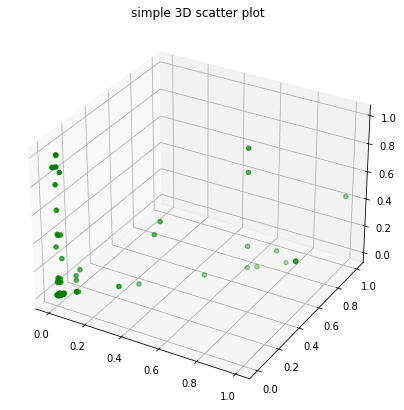

Interations!!!


             A         B         C         1         2         3 clusters
0    0.024022  0.878049  0.113821  0.333867  0.860984  0.864355        1
1    0.656829  0.707317  0.804878  0.690704  1.237964  1.085648        1
2    1.000000  0.439024  0.804878  0.984814  1.342714  1.177379        1
3    0.656829  0.878049  0.357724  0.532002  1.130666  1.042259        1
4    0.759780  0.105691  0.804878  0.941987  1.103369  0.916149        3
..        ...       ...       ...       ...       ...       ...      ...
145  0.016472  0.008130  0.034146  0.722973  0.036164  0.167437        2
146  0.013727  0.004065  0.032520  0.727848  0.036152  0.170454        2
147  0.015100  0.008130  0.034146  0.723276  0.035770  0.168068        2
148  0.013040  0.011382  0.035772  0.720198  0.035366  0.167420        2
149  0.010981  0.008130  0.033333  0.724512  0.034181  0.170724        2

[150 rows x 7 columns]
Sum of Square error are:  [13.94655006  6.12885196 21.14529523]
          A       

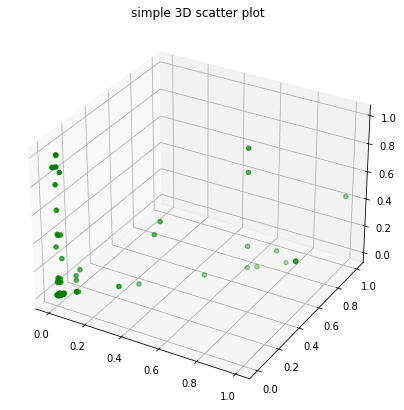

Interations!!!


             A         B         C         1         2         3 clusters
0    0.024022  0.878049  0.113821  0.370804  0.861158  0.971149        1
1    0.656829  0.707317  0.804878  0.632838  1.219285  0.830588        1
2    1.000000  0.439024  0.804878  0.931135  1.322866  0.888295        3
3    0.656829  0.878049  0.357724  0.482195  1.120931  0.949528        1
4    0.759780  0.105691  0.804878  0.902883  1.079846  0.575625        3
..        ...       ...       ...       ...       ...       ...      ...
145  0.016472  0.008130  0.034146  0.758533  0.014239  0.551118        2
146  0.013727  0.004065  0.032520  0.763486  0.017354  0.553983        2
147  0.015100  0.008130  0.034146  0.758907  0.013984  0.551728        2
148  0.013040  0.011382  0.035772  0.755981  0.011671  0.551065        2
149  0.010981  0.008130  0.033333  0.760379  0.013761  0.554298        2

[150 rows x 7 columns]
Sum of Square error are:  [ 9.67015569  8.2970665  18.02019523]
          A       

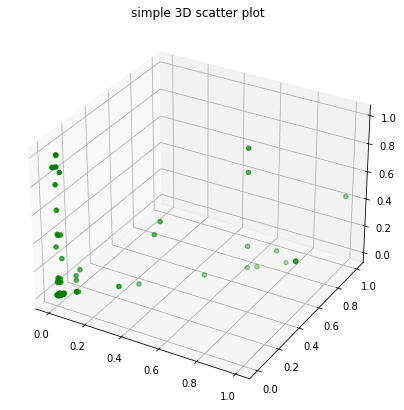

Interations!!!


             A         B         C         1         2         3 clusters
0    0.024022  0.878049  0.113821  0.266485  0.852944  1.048214        1
1    0.656829  0.707317  0.804878  0.702957  1.203471  0.736835        1
2    1.000000  0.439024  0.804878  1.025477  1.306341  0.780939        3
3    0.656829  0.878049  0.357724  0.511588  1.105450  0.944613        1
4    0.759780  0.105691  0.804878  1.015439  1.064912  0.449057        3
..        ...       ...       ...       ...       ...       ...      ...
145  0.016472  0.008130  0.034146  0.812751  0.022937  0.728986        2
146  0.013727  0.004065  0.032520  0.817549  0.027966  0.731915        2
147  0.015100  0.008130  0.034146  0.812997  0.023569  0.729574        2
148  0.013040  0.011382  0.035772  0.809819  0.021887  0.728782        2
149  0.010981  0.008130  0.033333  0.814024  0.025902  0.732080        2

[150 rows x 7 columns]
Sum of Square error are:  [ 8.343563   13.73261705 12.32097555]
          A       

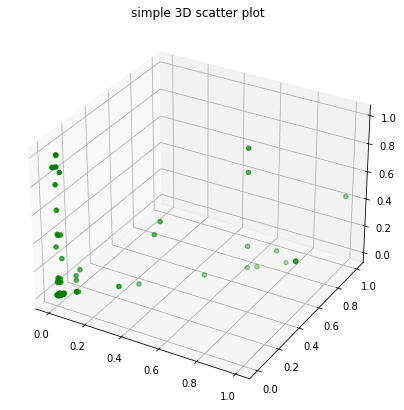

Interations!!!


             A         B         C         1         2         3 clusters
0    0.024022  0.878049  0.113821  0.242358  0.854172  1.088365        1
1    0.656829  0.707317  0.804878  0.719295  1.188496  0.748935        1
2    1.000000  0.439024  0.804878  1.050252  1.285031  0.837929        3
3    0.656829  0.878049  0.357724  0.519272  1.090071  1.011025        1
4    0.759780  0.105691  0.804878  1.048040  1.044738  0.519755        3
..        ...       ...       ...       ...       ...       ...      ...
145  0.016472  0.008130  0.034146  0.840719  0.042638  0.827410        2
146  0.013727  0.004065  0.032520  0.845469  0.047166  0.830101        2
147  0.015100  0.008130  0.034146  0.840934  0.043854  0.827783        2
148  0.013040  0.011382  0.035772  0.837702  0.044267  0.826496        2
149  0.010981  0.008130  0.033333  0.841853  0.047633  0.829694        2

[150 rows x 7 columns]
Sum of Square error are:  [ 8.79646501 16.18985243 10.18675338]
          A       

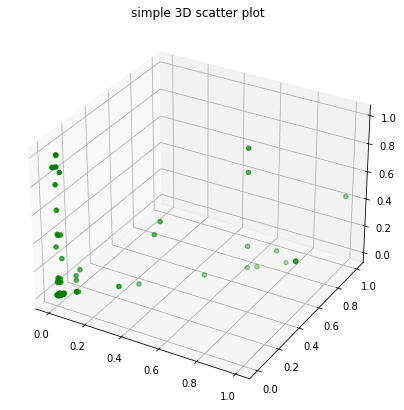

Interations!!!


             A         B         C         1         2         3 clusters
0    0.024022  0.878049  0.113821  0.266485  0.854172  1.113798        1
1    0.656829  0.707317  0.804878  0.702957  1.188496  0.764360        1
2    1.000000  0.439024  0.804878  1.025477  1.285031  0.849331        3
3    0.656829  0.878049  0.357724  0.511588  1.090071  1.035544        1
4    0.759780  0.105691  0.804878  1.015439  1.044738  0.527006        3
..        ...       ...       ...       ...       ...       ...      ...
145  0.016472  0.008130  0.034146  0.812751  0.042638  0.848666        2
146  0.013727  0.004065  0.032520  0.817549  0.047166  0.851255        2
147  0.015100  0.008130  0.034146  0.812997  0.043854  0.849022        2
148  0.013040  0.011382  0.035772  0.809819  0.044267  0.847761        2
149  0.010981  0.008130  0.033333  0.814024  0.047633  0.850884        2

[150 rows x 7 columns]
Sum of Square error are:  [ 8.97487577 16.18985243  9.97094246]
          A       

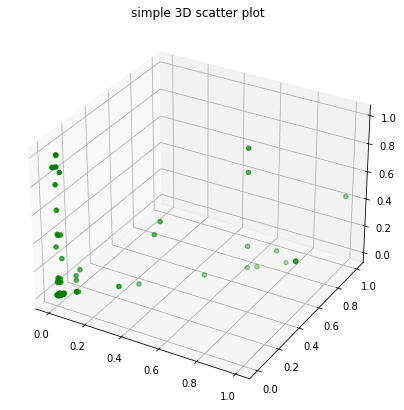

Interations!!!


             A         B         C         1         2         3 clusters
0    0.024022  0.878049  0.113821  0.266485  0.854172  1.113798        1
1    0.656829  0.707317  0.804878  0.702957  1.188496  0.764360        1
2    1.000000  0.439024  0.804878  1.025477  1.285031  0.849331        3
3    0.656829  0.878049  0.357724  0.511588  1.090071  1.035544        1
4    0.759780  0.105691  0.804878  1.015439  1.044738  0.527006        3
..        ...       ...       ...       ...       ...       ...      ...
145  0.016472  0.008130  0.034146  0.812751  0.042638  0.848666        2
146  0.013727  0.004065  0.032520  0.817549  0.047166  0.851255        2
147  0.015100  0.008130  0.034146  0.812997  0.043854  0.849022        2
148  0.013040  0.011382  0.035772  0.809819  0.044267  0.847761        2
149  0.010981  0.008130  0.033333  0.814024  0.047633  0.850884        2

[150 rows x 7 columns]
Sum of Square error are:  [ 8.97487577 16.18985243  9.97094246]
          A       

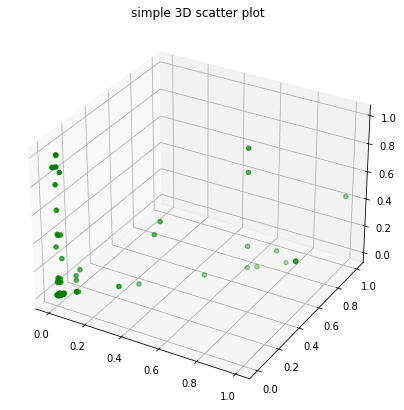

Interations!!!


             A         B         C         1         2         3 clusters
0    0.024022  0.878049  0.113821  0.266485  0.854172  1.113798        1
1    0.656829  0.707317  0.804878  0.702957  1.188496  0.764360        1
2    1.000000  0.439024  0.804878  1.025477  1.285031  0.849331        3
3    0.656829  0.878049  0.357724  0.511588  1.090071  1.035544        1
4    0.759780  0.105691  0.804878  1.015439  1.044738  0.527006        3
..        ...       ...       ...       ...       ...       ...      ...
145  0.016472  0.008130  0.034146  0.812751  0.042638  0.848666        2
146  0.013727  0.004065  0.032520  0.817549  0.047166  0.851255        2
147  0.015100  0.008130  0.034146  0.812997  0.043854  0.849022        2
148  0.013040  0.011382  0.035772  0.809819  0.044267  0.847761        2
149  0.010981  0.008130  0.033333  0.814024  0.047633  0.850884        2

[150 rows x 7 columns]
Sum of Square error are:  [ 8.97487577 16.18985243  9.97094246]
          A       

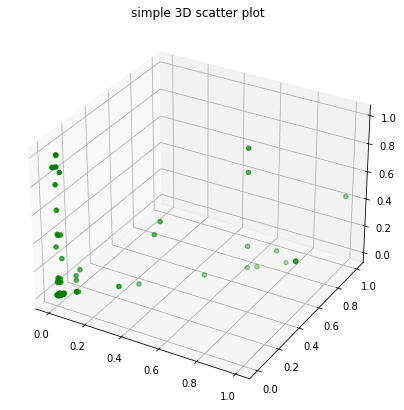

Interations!!!


             A         B         C         1         2         3 clusters
0    0.024022  0.878049  0.113821  0.266485  0.854172  1.113798        1
1    0.656829  0.707317  0.804878  0.702957  1.188496  0.764360        1
2    1.000000  0.439024  0.804878  1.025477  1.285031  0.849331        3
3    0.656829  0.878049  0.357724  0.511588  1.090071  1.035544        1
4    0.759780  0.105691  0.804878  1.015439  1.044738  0.527006        3
..        ...       ...       ...       ...       ...       ...      ...
145  0.016472  0.008130  0.034146  0.812751  0.042638  0.848666        2
146  0.013727  0.004065  0.032520  0.817549  0.047166  0.851255        2
147  0.015100  0.008130  0.034146  0.812997  0.043854  0.849022        2
148  0.013040  0.011382  0.035772  0.809819  0.044267  0.847761        2
149  0.010981  0.008130  0.033333  0.814024  0.047633  0.850884        2

[150 rows x 7 columns]
Sum of Square error are:  [ 8.97487577 16.18985243  9.97094246]
          A       

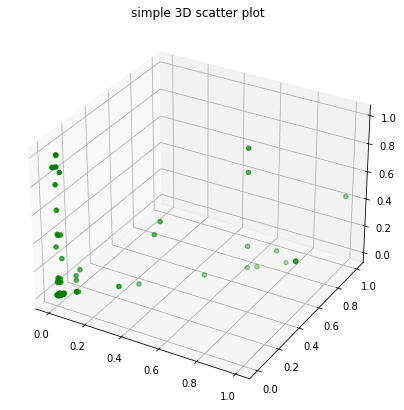

Interations!!!


             A         B         C         1         2         3 clusters
0    0.024022  0.878049  0.113821  0.266485  0.854172  1.113798        1
1    0.656829  0.707317  0.804878  0.702957  1.188496  0.764360        1
2    1.000000  0.439024  0.804878  1.025477  1.285031  0.849331        3
3    0.656829  0.878049  0.357724  0.511588  1.090071  1.035544        1
4    0.759780  0.105691  0.804878  1.015439  1.044738  0.527006        3
..        ...       ...       ...       ...       ...       ...      ...
145  0.016472  0.008130  0.034146  0.812751  0.042638  0.848666        2
146  0.013727  0.004065  0.032520  0.817549  0.047166  0.851255        2
147  0.015100  0.008130  0.034146  0.812997  0.043854  0.849022        2
148  0.013040  0.011382  0.035772  0.809819  0.044267  0.847761        2
149  0.010981  0.008130  0.033333  0.814024  0.047633  0.850884        2

[150 rows x 7 columns]
Sum of Square error are:  [ 8.97487577 16.18985243  9.97094246]
          A       

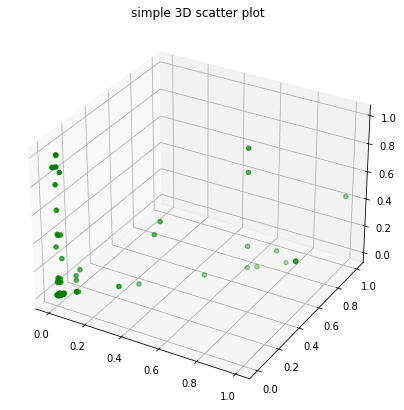

In [6]:
km1 = kmean(3,100,10)
km1.fit()